# Review

<font color='grey'><b>Hi, Raymond! My name is Maxim and I will be reviewing your project. I've put all my comments into markdown cells with different background colors.</b></font>

<div class="alert alert-success" role="alert">
  If you did something great I'll be using green color for my comment.
</div>

<div class="alert alert-warning" role="alert">
Yellow cell means it is an optional recommendation -- like when I think something can be improved, or simply offer an advice for your future work.
</div>

<div class="alert alert-danger" role="alert">
  If the topic requires some extra work before I can accept it then the color will be red
</div>

<div class="alert alert-info" role="alert">
  If you'd want to leave your own comment or ask a question or anything: use this cell style, so it would be easier for me to notice in the text  and adress it ;)
</div>

<font color='grey'><b>And, please! Do not delete my comments in further iterations of your project (if there would be any).</b></font>

# Step 1. Download the data and prepare it for analysis

Store the data on visits, orders, and expenses in variables. Optimize the data for analysis. Make sure each column contains the correct data type.

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np


visits_slice = pd.read_csv('/datasets/visits_log_us.csv')
orders_slice = pd.read_csv('/datasets/orders_log_us.csv')
costs_slice = pd.read_csv('/datasets/costs_us.csv')


In [2]:
costs_slice

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [3]:
#Check device column and change into category
print(visits_slice['Device'].value_counts())
visits_slice['Device'] = visits_slice['Device'].astype('category')

#Change start ts and end ts into correct time format
visits_slice['Start Ts'] =  pd.to_datetime(visits_slice['Start Ts'], format="%Y.%m.%d %H:%M")
visits_slice['End Ts'] =  pd.to_datetime(visits_slice['End Ts'], format="%Y.%m.%d %H:%M")

#Check size of visits slice
visits_slice.info(memory_usage='deep')

desktop    262567
touch       96833
Name: Device, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [4]:
#Change buy ts into correct time format
orders_slice['Buy Ts'] =  pd.to_datetime(orders_slice['Buy Ts'], format="%Y.%m.%d %H:%M")

#Check size of orders slice
orders_slice.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [5]:
#Change dt into correct date format
costs_slice['dt'] = pd.to_datetime(costs_slice['dt'])

#Check size of costs_slice
costs_slice.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [6]:
#Download data with correct data types
visits = pd.read_csv('/datasets/visits_log_us.csv', 
                  dtype={'Device': 'category'},
                  parse_dates=['Start Ts', 'End Ts'])

orders = pd.read_csv('/datasets/orders_log_us.csv',
                    parse_dates=['Buy Ts'])

costs = pd.read_csv('/datasets/costs_us.csv',
                   parse_dates=['dt'])
orders.head(5)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<div class="alert alert-success" role="alert">
Very good!
</div>

<div class="alert alert-danger" role="alert"><del>
Though, I didn't understand the decision to only read nrows=1000. The files aren't THAT big (only 10 MB, not 10 GB) and the more data the more precise is the analysis.
</div>

<div class="alert alert-warning" role="alert"><del>
Also, please provide some short conclusions here, something like we opened those and did that =)
</div>

Opened the a portion of the files to determine what is inside and then assigned the according file types in order to optimize the file size. 

I also arbitrarily decided on 1000 rows since I wasn't what was a good amount to use.

<div class="alert alert-warning" role="alert">
The good amount to use is the whole dataset, because why not? It's quite small anyway. With your permission I'll just disable this property, ok? =)
</div>

# Step 2. Make reports and calculate metrics

### Product Analysis

In [7]:
visits['Start Ts'].dt.date

0         2017-12-20
1         2018-02-19
2         2017-07-01
3         2018-05-20
4         2017-12-27
             ...    
359395    2017-07-29
359396    2018-01-25
359397    2018-03-03
359398    2017-11-02
359399    2017-09-10
Name: Start Ts, Length: 359400, dtype: object

In [8]:
#1. How many people use it every day, week, and month? 
visits['day'] = visits['Start Ts'].dt.date
visits['week'] = visits['Start Ts'].dt.week
visits['month'] = visits['Start Ts'].dt.month
visits['year'] = visits['Start Ts'].dt.year

phone = visits[visits['Device']=='touch']
comp = visits[visits['Device']=='desktop']

#phone users
#Daily active users
dau_total1 = phone.groupby('day').agg({'Uid': 'nunique'}).mean()

#Weekly active users
wau_total1 = phone.groupby(['year', 'week']).agg({'Uid': 'nunique'}).mean()

#Monthly active users
mau_total1 = phone.groupby(['year', 'month']).agg({'Uid': 'nunique'}).mean()

print('Daily Active Phone Users:', int(dau_total1))
print('Weekly Active Phone Users:', int(wau_total1))
print('Monthly Active Phone Users:', int(mau_total1))

#desktop users
#Daily active users
dau_total2 = comp.groupby('day').agg({'Uid': 'nunique'}).mean()

#Weekly active users
wau_total2 = comp.groupby(['year', 'week']).agg({'Uid': 'nunique'}).mean()

#Monthly active users
mau_total2 = comp.groupby(['year', 'month']).agg({'Uid': 'nunique'}).mean()

print('Daily Active Computer Users:', int(dau_total2))
print('Weekly Active Computer Users:', int(wau_total2))
print('Monthly Active Computer Users:', int(mau_total2))

Daily Active Phone Users: 252
Weekly Active Phone Users: 1634
Monthly Active Phone Users: 6825
Daily Active Computer Users: 659
Weekly Active Computer Users: 4129
Monthly Active Computer Users: 16724


<div class="alert alert-success" role="alert">
The general idea is absolutely correct!
</div>

<div class="alert alert-danger" role="alert"><del>
But.. aren't you a little concerned that your daily active users is almost the same as weekly active users? That's because the way you calculate DAU is slightly off.
<div class="alert alert-warning" role="alert">
As you can check yourself, both dt.month and dt.week return the unique number of the week or a month in a year. In other words, by naming a week number and a year you get the UNIQUE time interval. Same goes for month + year combo. You call December 2018 and you know that it's not repeated in the future or in the past. There's only ONE December in 2018.
<br>    
Now the tricky part is when you name day and year -- you don't get the same results. I.e. 20-th day of the month of 2018 year is actually 12 unique days instead of 1. One per each month.
<br>
Therefore, in order to get correct results you have to add one more groupby category in dau_total. Which is, obviously, 'month'.
<br>
<br>
The easier way would be to simply get <b>date</b> instead of <b>day</b>. In that case you don't even need to groupby by year, since the date is unique anyways.
</div>
</div>

<div class="alert alert-success" role="alert">
Fixed!
</div>    

<div class="alert alert-warning" role="alert">
Also, the separation by device type is probably not necessary at this point, provided that the same user has the same ID when visting from either phone or desktop. Simply checking the unique user ids would have sufficed ;)
</div>

In [9]:
#2. How many sessions are there per day? (One user might have more than one session.) 
dau_total = visits.groupby('day').agg({'Uid': 'count'}).mean()
print('Sessions per day:',int(dau_total))

Sessions per day: 987


<div class="alert alert-danger" role="alert"><del>
Same mistake here. Now you basically ask to show total amount of active users, which showed up at some specific day number each month for both years. And that's why your results exaggerated approximately by 12 times =)
</div>
    
<div class="alert alert-success" role="alert">
Fixed too!
</div>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


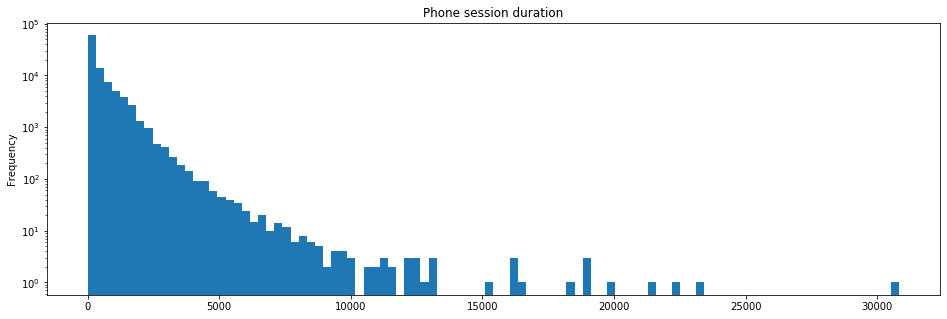

In [10]:
#3. What is the length of each session? 
#phone users
phone['session_duration_sec'] = (phone['End Ts'] - phone['Start Ts']).dt.seconds

#Histogram of the length of each session
phone['session_duration_sec'].plot(kind='hist', bins=100, figsize=(16,5), title='Phone session duration', log=True)



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


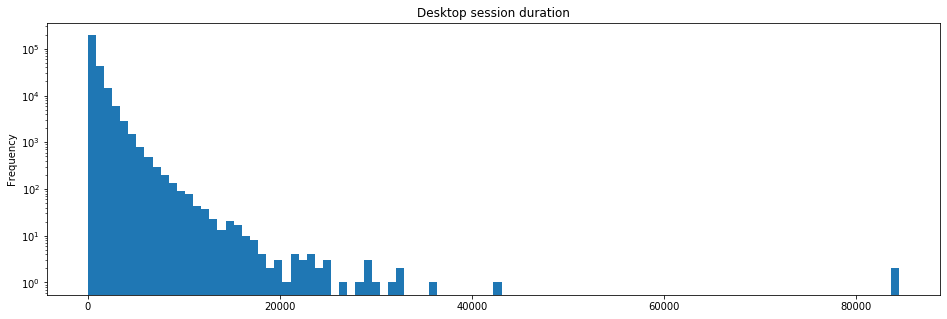

In [11]:
#desktop users
comp['session_duration_sec'] = (comp['End Ts'] - comp['Start Ts']).dt.seconds

#Histogram of the length of each session
#print('Desktop session duration')
comp['session_duration_sec'].plot(kind='hist', bins=100, figsize=(16,5), title='Desktop session duration', log=True)



<div class="alert alert-success" role="alert">
Very nice!
</div>

<div class="alert alert-warning" role="alert"><del>
As a general advice -- when dealing with values that vary by several orders of magnitude -- like they do here between 10 and 200000 -- the good option is to check log=True option. Though, in this case it will only enable Y axis logscale, there are ways to enable X axis logscale as well -- feel free to google that ;)
</div>
    
<div class="alert alert-success" role="alert">
Looks much better! =)
</div>

In [12]:
#4. How often do users come back?

#Daily active users
dau_total = visits.groupby('day').agg({'Uid': 'nunique'}).mean()

#Weekly active users
wau_total = visits.groupby(['year', 'week']).agg({'Uid': 'nunique'}).mean()

#Monthly active users
mau_total = visits.groupby(['year', 'month']).agg({'Uid': 'nunique'}).mean()


#monthly audience percentage
sticky_mau = ((dau_total) / (mau_total))*100

#weekly audience percentage
sticky_wau = ((dau_total) / (wau_total))*100

print('Weekly audience percentage of users that return:', int(sticky_wau),'%')
print('Monthly audience percentage of users that return:', int(sticky_mau),'%')

Weekly audience percentage of users that return: 15 %
Monthly audience percentage of users that return: 3 %


<div class="alert alert-danger" role="alert"><del>
Seems like you forgot to calculate mau_total in the cell above, and therefore the execution results in compilation error. That should be easy to fix though, so no worries ;)
</div>

<div class="alert alert-success" role="alert">
Great!   
</div>

<div class="alert alert-warning" role="alert">
Also, it would probably be pretty cool to see some graph here for informativity. Histogram or a heatmap -- you decide =)
</div>

I'm not too sure how you can use histogram / heatmap to visually represent the data for this part.

<div class="alert alert-warning" role="alert">
Ok, my bad, not a histogram -- just a standard plot, but check this out:
</div>

In [13]:
#Setting up month names instead of numbers:

#Calculating users per month:
users_per_month = visits.groupby('month').agg({'Uid': ['count','nunique']}).reset_index()
users_per_month.columns = users_per_month.columns.droplevel()
users_per_month.columns = ['month', 'total', 'unique']


#Calculating users per week:
users_per_week = visits.groupby('week').agg({'Uid': ['count','nunique']}).reset_index()
users_per_week.columns = users_per_week.columns.droplevel()
users_per_week.columns = ['week', 'total', 'unique']


#Calculating users per day:
users_per_day = visits.groupby('day').agg({'Uid': ['count','nunique']}).reset_index()
users_per_day.columns = users_per_day.columns.droplevel()
users_per_day.columns = ['day', 'total', 'unique']
users_per_day['date'] = pd.to_datetime(users_per_day['day'])
users_per_day.set_index('day', inplace=True)



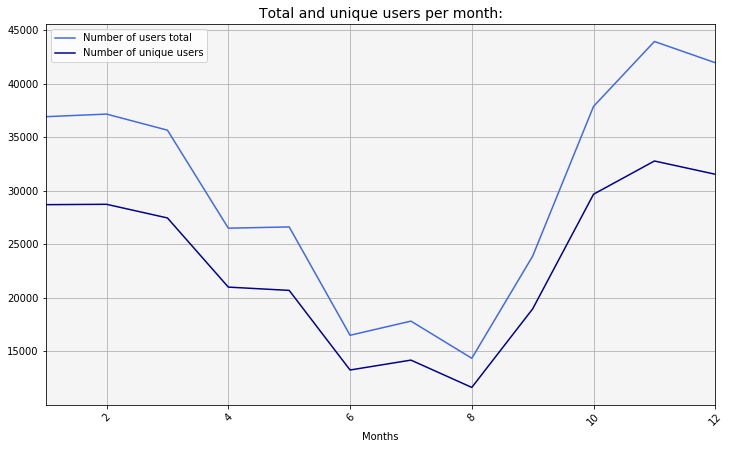

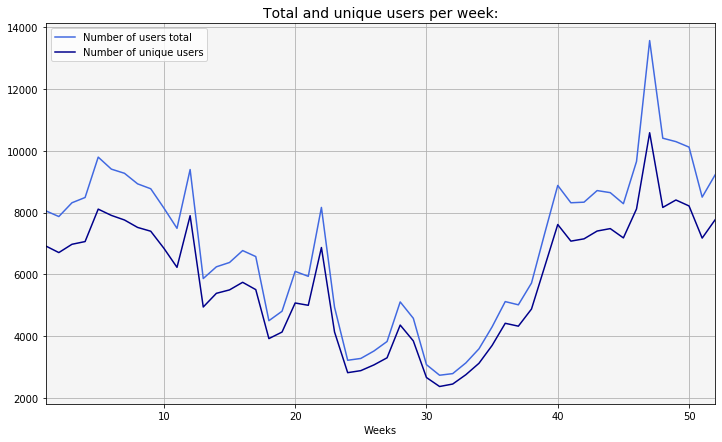

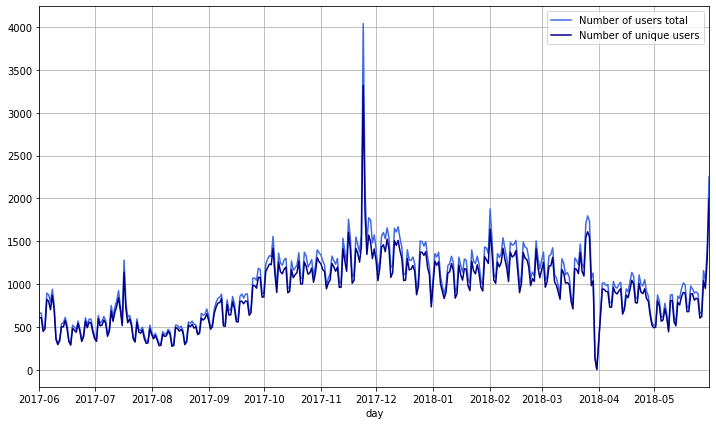

In [14]:

#Graph for users per month:
users_months = users_per_month.plot(x='month', y=['total', 'unique'],\
                                    color=('royalblue', 'darkblue'), grid=True, figsize=(12,7))

users_months.set_title('Total and unique users per month:', fontsize=14)
users_months.set_facecolor('whitesmoke')
users_months.set_xlabel('Months')
users_months.legend(['Number of users total', 'Number of unique users'])
plt.xticks(rotation=45)
plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

#Graph for users per week:
users_weeks = users_per_week.plot(x='week', y=['total', 'unique'], kind='line',\
                                  color=('royalblue', 'darkblue'), grid=True, figsize=(12,7))

users_weeks.set_title('Total and unique users per week:', fontsize=14)
users_weeks.set_facecolor('whitesmoke')
users_weeks.set_xlabel('Weeks')
users_weeks.legend(['Number of users total', 'Number of unique users'])
plt.show()

# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


#Graph for users per day:
users_days = users_per_day.plot(y=['total', 'unique'], color=('royalblue', 'darkblue'), grid=True, figsize=(12,7))
users_days.legend(['Number of users total', 'Number of unique users'])
plt.show()

<div class="alert alert-warning" role="alert">
If something in that code is not clear -- feel free to google it up ;)    
</div>

<div class="alert alert-danger" role="alert"><del>
Also, please add a little concusion here and after the every sub-step, so that the reader would immediately see what you were doing, without checking each line of code ;)</div>
    
<div class="alert alert-success" role="alert">
Ok, that will do! =)    
</div>

There seems to be more users that prefer to use the desktop site instead of the touch version. Also, users that return drop off a lot especially monthly ones.

### Sales Analysis

<div class="alert alert-warning" role="alert">
Don't forget to mark sub-steps with headings (like shown above), since otherwise it's a little bit confusing what starts where xD
</div>

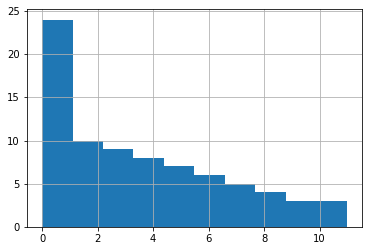

In [15]:
#1. When do people start buying? 
first_order_date_by_customers = orders.groupby('Uid')['Buy Ts'].min()
first_order_date_by_customers.name = 'first_order_date'
orders = orders.join(first_order_date_by_customers, on='Uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')


orders_first_buy = orders.groupby(['first_order_month','order_month']).agg({'Uid':'nunique'}).reset_index()
orders_first_buy['cohort_lifetime'] = orders_first_buy['order_month'] - orders_first_buy['first_order_month']
orders_first_buy['cohort_lifetime'] = orders_first_buy['cohort_lifetime'] / np.timedelta64(1,'M')
orders_first_buy['cohort_lifetime'].hist()



<div class="alert alert-success" role="alert">
Your calculations for "orders" seem to be absolutely correct!
</div>
    
    
<div class="alert alert-danger" role="alert"><del>
However seems like you misunderstood the task description a little bit, but no worries, I can help =)
    
<div class="alert alert-warning" role="alert">
To answer the question "Find out when users _start_ buying", it would probably make sense to start with calculating the difference between the first visit and the first order =) (In days, weeks or months -- doesn't really matter)
And after you calcualte that difference for every user you can simply plot it as histogram.
<br>  
<br>
And also please check that first_visit is less than buy_ts. If someone's first visit wasn't stored in ``visits``, we will have negative ``time_to_buy`` value.   
</div>    
</div>

<div class="alert alert-success" role="alert">
Very nice!
</div>

<div class="alert alert-warning" role="alert">
But adding some conclusions here wouldn't hurt at all =) Because otherwise it's not really clear what that graph is and what you were trying to show with it.
</div>

In [16]:
#2. How many orders do they make during a given period of time? 
orders.pivot_table(index='first_order_month',
                   columns='order_month',
                   values='Uid',
                   aggfunc='nunique',
                   fill_value='')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,2023,61,50,54,88,67,62,47,58,45,45,53,
2017-07-01,,1923,52,57,64,49,38,36,39,42,22,26,
2017-08-01,,,1370,58,53,44,40,32,30,44,19,31,
2017-09-01,,,,2581,130,100,74,52,64,66,37,43,
2017-10-01,,,,,4340,206,123,92,93,72,56,67,
2017-11-01,,,,,,4081,222,120,106,81,48,62,
2017-12-01,,,,,,,4383,146,103,97,50,63,
2018-01-01,,,,,,,,3373,114,83,43,45,
2018-02-01,,,,,,,,,3651,118,58,39,


<div class="alert alert-success" role="alert">
That looks pretty cool, good job!
</div>

In [17]:
#3. What is the average purchase size?
orders_grouped_by_cohorts = orders.groupby(
    ['first_order_month','order_month']).agg({'Revenue':'sum','Uid':'nunique'})

orders_grouped_by_cohorts['revenue_per_user']=orders_grouped_by_cohorts['Revenue']/orders_grouped_by_cohorts['Uid']

orders_grouped_by_cohorts.pivot_table(index='first_order_month',
                                      columns='order_month',
                                      values='revenue_per_user',
                                      aggfunc='mean')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


<div class="alert alert-success" role="alert">
Looks good! =)
</div>

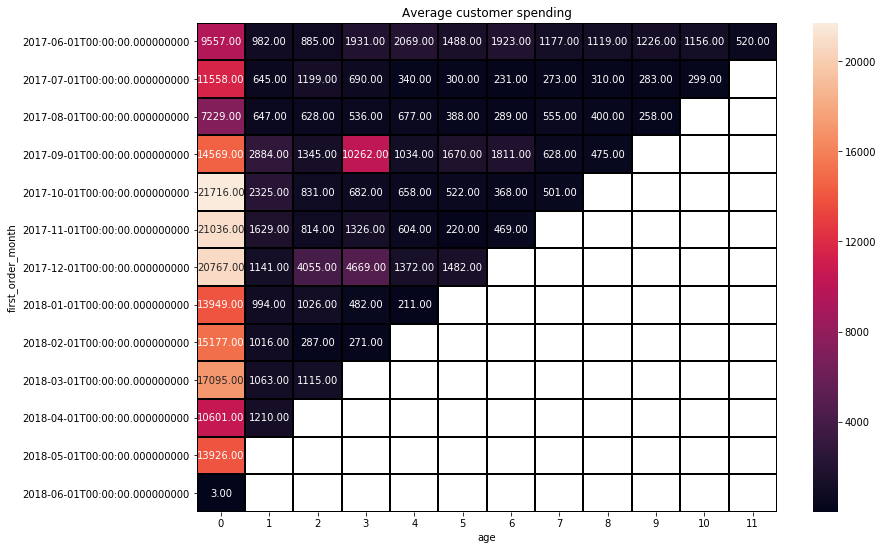

In [18]:
#4. How much money do they bring? (LTV)
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']
cohorts = orders.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']


report = pd.merge(cohort_sizes, cohorts, on='first_order_month')


report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

result = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='Revenue', 
    aggfunc='mean').round()


plt.figure(figsize=(13, 9))
plt.title('Average customer spending')
sns.heatmap(result, annot=True, fmt='.2f', linewidths=1, linecolor='black')

<div class="alert alert-success" role="alert">
Ok, except sub-step 1, all other seems to be correct, good job!
</div>

<div class="alert alert-warning" role="alert"><del>
But do you think you could increase the informativity just a little bit by plotting the results? Try sns.heatmap, for example ;)
</div>

<div class="alert alert-danger" role="alert"><del>
Also, again, don't forget mini-conclusions, they are rather important =)
</div>
    
<div class="alert alert-success" role="alert">
Excellent! Heatmap looks really pretty =)
</div>

Users make purchases at the start, but it drops off fast with a few exceptions. On the other hand, the users that do stay end up making a decent of purchases.

### Marketing Analysis

Overall cost: 329131.62


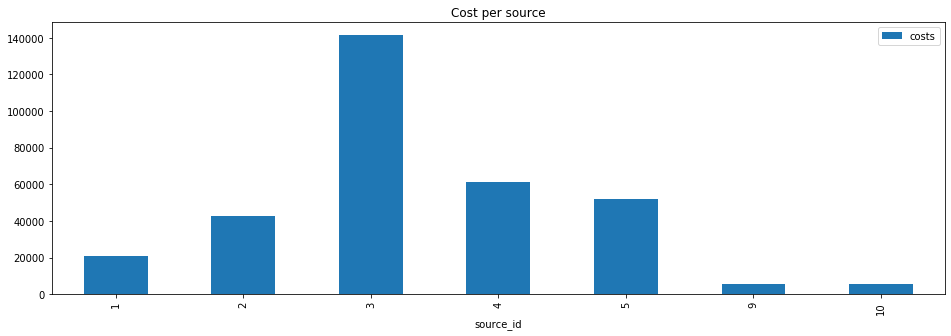

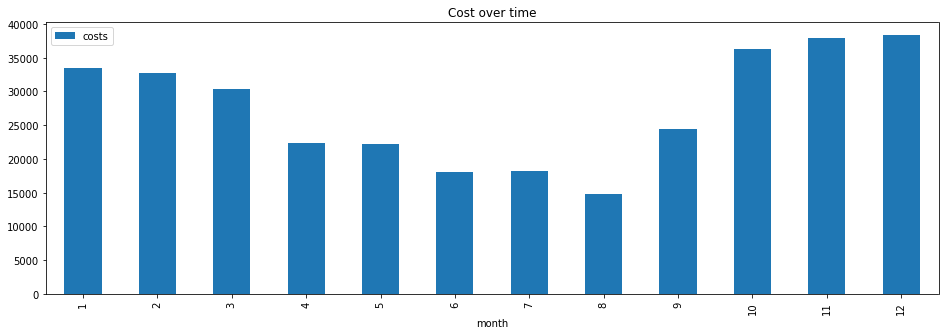

In [19]:
#1. How much money was spent? Overall/per source/over time 

print('Overall cost:',costs['costs'].sum())

per_source = costs.groupby('source_id').agg({'costs':'sum'}).reset_index()
per_source.plot(x='source_id', y='costs', kind='bar', figsize=(16,5),title='Cost per source')

costs['month'] = costs['dt'].dt.month
over_time = costs.groupby('month').agg({'costs':'sum'})
over_time.plot(y='costs', kind='bar', figsize=(16,5),title='Cost over time')

<div class="alert alert-warning" role="alert">
Pretty nice! But bar plot in this case would be probably more informative than the standard line plot.
<br>
Well, obviously, before you do the barplot in the second case it is worth creating months bins - otherwise you'd just get way too many bars, haha =)
</div>

In [20]:
#2. How much did customer acquisition from each of the sources cost?
#Create a slice from the orders table of users that made an order
orders_users = orders[orders['Revenue'] > 0]
unique_users = orders_users['Uid'].nunique()

per_source['user_cost_per_source'] = per_source['costs'] / unique_users
per_source

,source_id,costs,user_cost_per_source
0,1,20833.27,0.570634
1,2,42806.04,1.172479
2,3,141321.63,3.870871
3,4,61073.60,1.672837
4,5,51757.10,1.417653
5,9,5517.49,0.151127
6,10,5822.49,0.159481


<div class="alert alert-danger" role="alert"><del>
You're just displaying here the total money spent per source. Haven't you already done that in previous step? =) Now you need to divide that by the number of inique users. And take in mind, that it's better to count only those users, who made at least one order (i.e. whose ``uid`` is in ``orders`` table). If the user only visited the site, we can't consider them a customer.
</div>

<div class="alert alert-success" role="alert">
Perfect!
</div>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

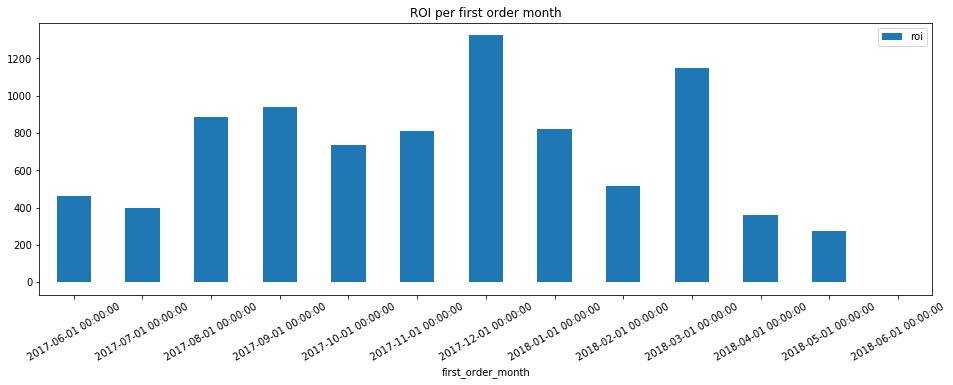

In [35]:
#3. How worthwhile where the investments? (ROI)

roi = orders_grouped_by_cohorts.reset_index().join(costs)
roi['roi'] = (roi['Revenue'] - roi['costs']) / roi['costs']
#roi.plot(kind='bar',x='order_month', y='roi', figsize=(16,5), title='ROI per month')

x = roi.pivot_table(index='first_order_month', values='roi', aggfunc='sum').reset_index()
x.plot(kind='bar',x='first_order_month', y='roi', figsize=(16,5), title='ROI per first order month')
plt.xticks(rotation=30)


<div class="alert alert-danger" role="alert"><del>
It would probably make more sense if you displayed ROI by cohorts  -- pretty much the same way you did in Step 2.2 ;)
</div>

<div class="alert alert-success" role="alert">
Much better!
</div>    

<div class="alert alert-warning" role="alert">
But are you sure that your ['Revenue'] entirely corresponds to you ['costs'] column? Because the numbers you're getting are a little bit too high.
<br>
I'll leave it to you to figure out as a facultative task ;)
</div>

The current ROI indicates that the approach we're taking isn't paying off as well as we would've wanted. Either more analysis needs to be done to see if the trend indicates revenue growth, or a different approach to earn more revenue.

# Step 3. Write a conclusion: advise marketing experts how much money to invest and where

I would recommend Yandex.Afisha to focus on the touch users since there is still room for growth for those users. I would also recommend looking into more of ad sources 1, 9 and 10 since they both cost significantly lower than the other ad sources. That can potentially lead to lower costs and capture more of a customer base.

There can also be more profit to be made during the months of August and April since there is a noticeable dip in customer purchases around that time. 

<div class="alert alert-success" role="alert">
All in all, I think this project has a great potential, so keep it going and don't give up! I'll be eagerly waiting for your reply =)
<br>
Good luck!
</div>

<div class="alert alert-success" role="alert">
Well, here we are! You did a very goo job this time! ;) I left some "yellow" comments for you as a facultative task - feel free to return to them whenever you want ;)
<br>
So, as much as it was a pleasure reviewing your work, I think you're ready now =) Therefore, I'm accepting your project and wish you best of luck in your future studies!
<br>   
<br> 
Cheers!
</div>